### Проверяем работу регуляризации в полиномиальной регрессии

1. Генерируем выборку для нашего примера
1. Делаем восстановление зависимости полиномом
1. Строим график восстановленной зависимости для разных C

# 1. Генерируем выборку

Как генерировать:

Пусть y(x) на самом деле полином, но сильно меньшей степени.

In [82]:
import numpy as np

L = 10 #количество точек в обучающей выборке

x = np.linspace(-5, 5, L)
print x

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


In [83]:
def true_poly(x):
    return 0.1 * x ** 4 + 0.2 * x ** 3 - 0.25 * x ** 2 + 2 * x - 1
    
y = true_poly(x)
print y

[  2.02500000e+01  -1.44943606e+00  -6.81752020e+00  -5.18209877e+00
  -2.21303917e+00   7.77701570e-02   3.33641975e+00   1.28669791e+01
   3.76314967e+01   9.02500000e+01]


Посмотрим, что получилось

In [84]:
import matplotlib.pylab as plt

In [85]:
%matplotlib inline

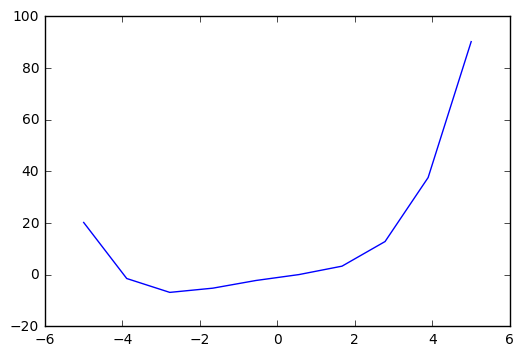

In [86]:
plt.plot(x, y)
plt.show()

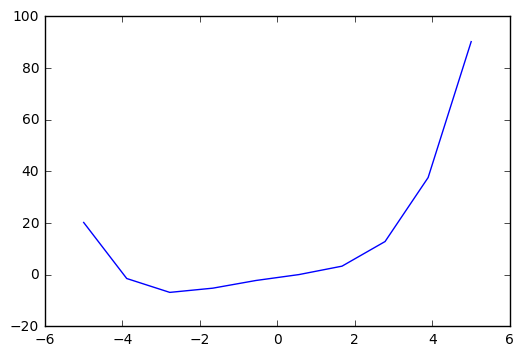

In [87]:
y_with_noise = y + 0 * np.random.randn(L)

plt.plot(x, y_with_noise)
plt.show()

# 2. Делаем восстановление зависимости полиномом

In [88]:
def poly(x, coeffs):
    return sum([coeffs[k] * x ** k for k in range(len(coeffs))])

In [89]:
print poly(1, [0.1, 4, 0.2, - 0.25, 2, - 1][::-1])

5.05


In [120]:
C = 100
def loss_function(coeffs):
    loss = 0.0
    loss += sum((poly(x, coeffs) - y_with_noise) ** 2)
        
    loss += C * sum((coeffs ** 2))
    return loss

In [121]:
from scipy.optimize import minimize

result = minimize(loss_function, np.array([0.001] * 10))

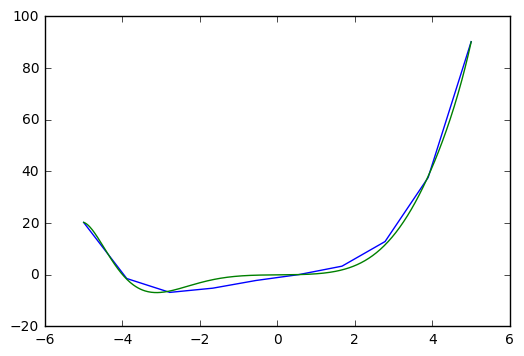

In [122]:
plt.plot(x, y_with_noise)
detailed_x = np.linspace(-5, 5, 500)
plt.plot(detailed_x, poly(detailed_x, result.x))
plt.show()